In [1]:
## import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
## make sure google drive is connected to colab
from google.colab import drive
drive.mount('/content/gdrive')
file_path="/content/gdrive/My Drive/Colab Notebooks/"
titanic_data=pd.read_csv(file_path+"titanic_train.csv")

Mounted at /content/gdrive


In [3]:
## look at the original data
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
 ## drop the na values of the data
 titanic_data = titanic_data.dropna()
 titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,47.0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,33.0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,56.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0


Text(0, 0.5, 'Number of People')

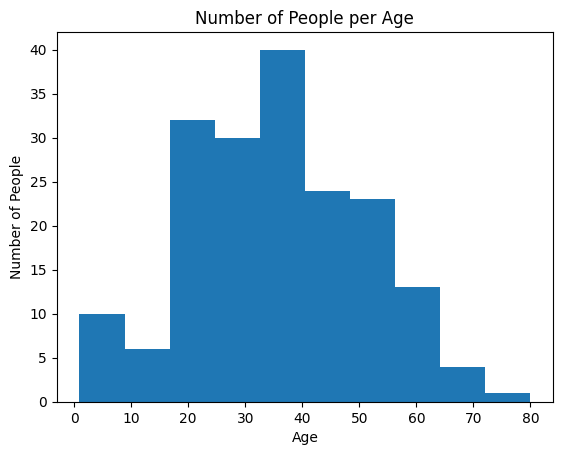

In [57]:
# The graph shows the ranges of age and how mnay people are each age
plt.hist(titanic_data["Age"])
plt.title("Number of People per Age")
plt.xlabel("Age")
plt.ylabel("Number of People")

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64


Text(0.5, 1.0, 'Embarked')

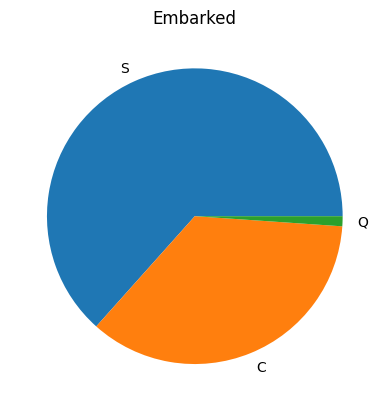

In [64]:
# The pie charts shows the number of passengers embared per category
print(titanic_data["Embarked"].value_counts())
plt.pie(titanic_data["Embarked"].value_counts(), labels=titanic_data["Embarked"].value_counts().index)
plt.title("Embarked")

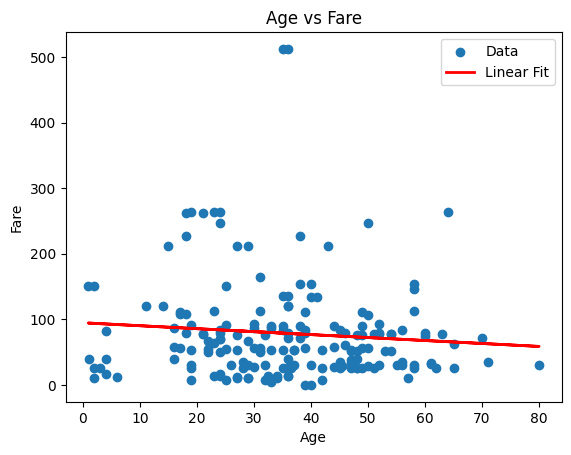

In [53]:
## Scatter plot of fare and age with a linear fit line on it
age =titanic_data["Age"]
fare=titanic_data["Fare"]
plt.scatter(age,fare,label="Data")
plt.plot(age,linear_fit,linewidth=2,color="red",label="Linear Fit")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()

In [21]:
## Creating a linear regression model
linear_model = scipy.stats.linregress(age, fare)
print(linear_model)

LinregressResult(slope=-0.45106254749553615, intercept=94.77386642798255, rvalue=-0.0924238562099994, pvalue=0.21335794745107714, stderr=0.36120231067743647, intercept_stderr=14.063985642433583)


In [22]:
# Extracts the slope and y-intercept from the linear model
slope = linear_model.slope
intercept = linear_model.intercept

# Creates a linear fit to the data
linear_fit = slope*age+intercept

In [54]:
## number of people that survived from each class
survived_by_class = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass').size()
print(survived_by_class)


Pclass
1    106
2     12
3      5
dtype: int64


Text(0.5, 1.0, 'Number of Survivors by Passenger Class')

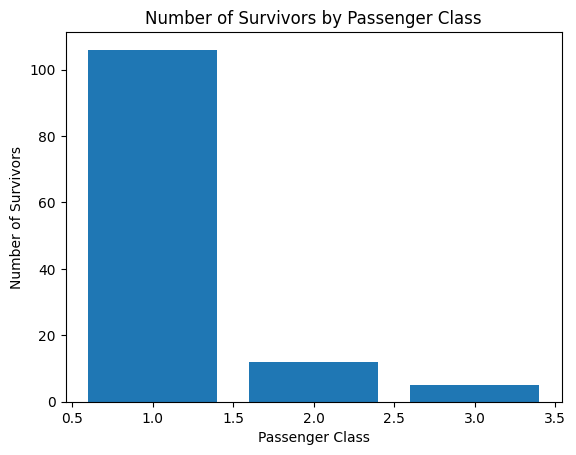

In [55]:
## shows the number of people that survived in each class on a bar graph
plt.bar(survived_by_class.index, survived_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Passenger Class')

In [36]:
## Find the amount of people that survived for each class
Survived_per_class=pd.crosstab(titanic_data["Survived"],titanic_data["Pclass"])
print(Survived_per_class)

Pclass      1   2  3
Survived            
0          52   3  5
1         106  12  5


In [40]:
## use scipy stats to perform a chi squared test to find the p value
c,p,dof,expected=scipy.stats.chi2_contingency(Survived_per_class)
print("P-Value",p)
# There is a signficant relationship between who survived and what class they were in

P-Value 0.2925044966484259


In [45]:
## mmake a pivot table of fare and embarked
fare_classpt=pd.pivot_table(titanic_data,values="Fare",index="Embarked")
print(fare_classpt)

                Fare
Embarked            
C         103.342503
Q          90.000000
S          64.669216


Text(0, 0.5, 'Fare')

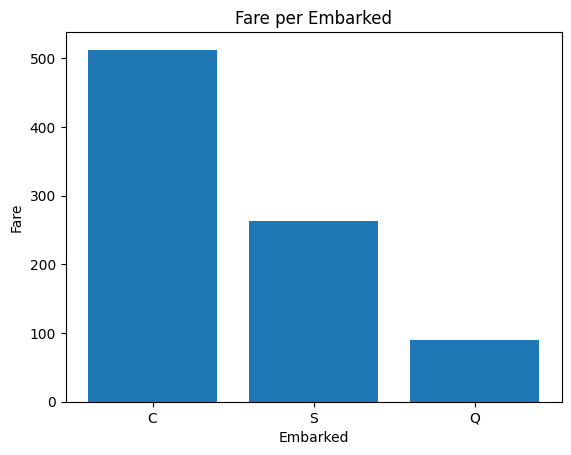

In [48]:
## bar graph of fare and embarked
fare=titanic_data["Fare"]
embarked=titanic_data["Embarked"]
plt.bar(embarked,fare)
plt.title("Fare per Embarked")
plt.xlabel("Embarked")
plt.ylabel("Fare")